# Project: Wrangling and Analyze Data

In [4]:
#Update required libraries
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [49]:
#Import requisite modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import tweepy
import json
%matplotlib inline 

## Data Gathering

In [204]:
#Read the enhanced twitter archive data into a pandas dataframe.
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [205]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [545]:
#Assign the folder that the image prediction file will be downloaded to create a folder if it doesnt exist and download the file.
folder_name = 'prediction_image'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open (os.path.join(folder_name,url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [546]:
#check folder to confirm downlaod
os.listdir(folder_name)

['image-predictions.tsv']

In [29]:
#Read image prediction file into pandas dataframe
image_predictions = pd.read_csv("prediction_image\image-predictions.tsv" , sep ='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [32]:
#Create an API object that will be used to query twitter API

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth)

In [66]:
#Get Additional twitter data,save it to a file and read it line by line
id_errors = []
dictkeys = {'id','full_text','retweet_count','favorite_count'}
with open('tweet_json.txt', 'w') as file:
    for tweet_id in twitter_archive_enhanced['tweet_id']:
        try:
            exp_tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            data = exp_tweet._json
            dictionary = {key: data[key] for key in data.keys() & dictkeys}
            json.dump(dictionary, file)
            file.write('\n')
        except:
            id_errors.append(tweet_id)

add_twitter_data = pd.read_json('tweet_json.txt',lines = True)

In [69]:
add_twitter_data

,favorite_count,full_text,retweet_count,id
0,33649,This is Phineas. He's a mystical boy. Only eve...,6955,892420643555336193
1,29181,This is Tilly. She's just checking pup on you....,5263,892177421306343426
2,21945,This is Archie. He is a rare Norwegian Pouncin...,3463,891815181378084864
3,36719,This is Darla. She commenced a snooze mid meal...,7177,891689557279858688
4,35118,This is Franklin. He would like you to stop ca...,7706,891327558926688256
...,...,...,...,...
1766,573,This is Skittles. I would kidnap Skittles. Pin...,171,668190681446379520
1767,424,This is a Trans Siberian Kellogg named Alfonso...,161,668171859951755264
1768,438,Fun dogs here. Top one clearly an athlete. Bot...,272,668154635664932864
1769,508,This lil pup is Oliver. Hops around. Has wings...,238,668142349051129856


In [68]:
len(id_errors)

585

In [448]:
add_twitter_data.isnull().any().sum()

0

## Assessing Data

##### Visual assessment of all dataset
* Twitter Archive 

In [206]:
#Visual assement of the twitter archive data

twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [207]:
twitter_archive_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1099,735991953473572864,NaN,NaN,2016-05-27 00:32:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxaroni. He's curly af. Also rather f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735991953...,11,10,Maxaroni,None,None,None,None
1464,694356675654983680,6.706684e+17,4.196984e+09,2016-02-02 03:08:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper only appears through the hole of a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694356675...,10,10,None,None,None,pupper,None
1523,690607260360429569,6.903413e+17,4.670367e+08,2016-01-22 18:49:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 @LightningHoltt,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
807,771908950375665664,NaN,NaN,2016-09-03 03:13:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Doggo will persevere. 13/10\nhttps://t.co/yOVz...,NaN,NaN,NaN,https://twitter.com/yahoonews/status/771905568...,13,10,None,doggo,None,None,None
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1910,674416750885273600,NaN,NaN,2015-12-09 02:34:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jonah. He's a Stinted Fisher Price. En...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674416750...,10,10,Jonah,None,None,None,None
2108,670452855871037440,NaN,NaN,2015-11-28 04:03:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog can't see its haters. 11/10 https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670452855...,11,10,None,None,None,None,None
630,794332329137291264,NaN,NaN,2016-11-04 00:15:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nimbus (like the cloud). He just bough...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794332329...,12,10,Nimbus,None,None,None,None
587,799757965289017345,NaN,NaN,2016-11-18 23:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sobe. She's a h*ckin happy doggo. Only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799757965...,13,10,Sobe,doggo,None,None,None


In [72]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [73]:
twitter_archive_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


* Image prediction data

In [74]:
#Visual assessment of Image prediction data
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [75]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1220,743980027717509120,https://pbs.twimg.com/media/ClMl4VLUYAA5qBb.jpg,1,bull_mastiff,0.975730,True,Rhodesian_ridgeback,0.008073,True,pug,0.005571,True
1216,743545585370791937,https://pbs.twimg.com/media/ClGawiUWAAAgs0w.jpg,2,rapeseed,0.876875,False,standard_poodle,0.060583,True,Great_Pyrenees,0.033006,True
1045,712809025985978368,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True
704,684926975086034944,https://pbs.twimg.com/media/CYFZXdiU0AAc_kw.jpg,1,Labrador_retriever,0.769412,True,golden_retriever,0.144893,True,lion,0.021440,False
1398,768473857036525572,https://pbs.twimg.com/media/Cqoq5PGWAAA-U8T.jpg,1,Labrador_retriever,0.739170,True,Chesapeake_Bay_retriever,0.246488,True,kelpie,0.006892,True
764,688916208532455424,https://pbs.twimg.com/media/CY-Fn1FWEAQhzhs.jpg,1,Pembroke,0.430544,True,red_fox,0.206576,False,Pomeranian,0.154352,True
1101,720785406564900865,https://pbs.twimg.com/media/CgC-gMCWcAAawUE.jpg,1,Chihuahua,0.896422,True,dingo,0.027929,False,kelpie,0.017916,True
1421,772102971039580160,https://pbs.twimg.com/media/CrcPjh0WcAA_SPT.jpg,1,Pembroke,0.541780,True,Cardigan,0.260504,True,Shetland_sheepdog,0.063703,True
329,672082170312290304,https://pbs.twimg.com/media/CVO3KodXAAAj1de.jpg,1,hamster,0.132440,False,toy_poodle,0.123962,True,bubble,0.056212,False
445,674646392044941312,https://pbs.twimg.com/media/CVzTUGrW4AAirJH.jpg,1,flat-coated_retriever,0.837448,True,groenendael,0.086166,True,Labrador_retriever,0.016052,True


* Additional twitter data

In [76]:
#Visual assessment of add_twitter_data
add_twitter_data

,favorite_count,full_text,retweet_count,id
0,33649,This is Phineas. He's a mystical boy. Only eve...,6955,892420643555336193
1,29181,This is Tilly. She's just checking pup on you....,5263,892177421306343426
2,21945,This is Archie. He is a rare Norwegian Pouncin...,3463,891815181378084864
3,36719,This is Darla. She commenced a snooze mid meal...,7177,891689557279858688
4,35118,This is Franklin. He would like you to stop ca...,7706,891327558926688256
...,...,...,...,...
1766,573,This is Skittles. I would kidnap Skittles. Pin...,171,668190681446379520
1767,424,This is a Trans Siberian Kellogg named Alfonso...,161,668171859951755264
1768,438,Fun dogs here. Top one clearly an athlete. Bot...,272,668154635664932864
1769,508,This lil pup is Oliver. Hops around. Has wings...,238,668142349051129856


In [77]:
add_twitter_data.sample(10)

,favorite_count,full_text,retweet_count,id
231,28699,SHE DID AN ICY ZOOM AND KNEW WHEN TO PUT ON TH...,9130,846139713627017216
427,0,RT @dog_rates: This is Bo. He was a very good ...,34355,819015337530290176
13,23544,This is Ted. He does his best. Sometimes that'...,3694,889638837579907072
440,48316,This is Buddy. He ran into a glass door once. ...,24949,817827839487737858
1639,852,Silly dog here. Wearing bunny ears. Nice long ...,465,670465786746662913
365,20221,This is Loki. He smiles like Elvis. Ain't noth...,4579,826958653328592898
1021,2493,Please only send in dogs. Don't submit other t...,692,692919143163629568
1183,6766,HEY PUP WHAT'S THE PART OF THE HUMAN BODY THAT...,2597,683515932363329536
506,9604,This is Ito. He'll be your uber driver tonight...,2848,808838249661788160
551,5709,oh h*ck 10/10 https://t.co/bC69RrW559,770,801285448605831168


##### Programmatic assessment of all data set

* Twitter Archive


In [78]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [240]:
twitter_archive_enhanced.query('tweet_id == 883482846933004288')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None


In [80]:
twitter_archive_enhanced.duplicated().sum()

0

In [82]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [287]:
#For clarity a spreadsheet file will be used to check actual ratings in the text againts the ratings in the numerator and denominator
twitter_archive_enhanced.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [86]:
twitter_archive_enhanced.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

* Image prediction

In [87]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [90]:
image_predictions.duplicated().sum()

0

In [91]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [456]:
image_predictions.p1.nunique()

378

In [453]:
image_predictions.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

* Additional twitter data

In [92]:
add_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   favorite_count  1771 non-null   int64 
 1   full_text       1771 non-null   object
 2   retweet_count   1771 non-null   int64 
 3   id              1771 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 55.5+ KB


In [93]:
add_twitter_data.duplicated().sum()

0

### Quality issues
1. `Twitter Archive`: Retweet and reply data is present in dataset, only original tweets are required.

2. `Twitter Archive`: Insignificant columns (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_timestamp,name,doggo,floofer,pupper,puppo) to be removed.

3. `Twitter Archive` : Timestamp data type 'object' instead of 'datetime'.

4. `Twitter Archive` : Incorrect dog rates.

5. `Twitter Archive` : Significantly out of range ratings, mostly for group of dogs.
    
6. Tweet ID datatype is int instead of string.

7. `Image prediction` : Non descriptive column headers.

8. `Image predicion`: Inconsistent format for predicted dog breeds, some capitalized others were not.

### Tidiness issues
1. `Additional twitter data` : Favorite count and retweet should be in the twitter archive table.

2. `Twitter Archive`: Expanded Urls contains more than one variable

## Cleaning Data

In [389]:
# Make copies of original pieces of data
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
add_twitter_data_clean = add_twitter_data.copy()

# Quality

### Issue #1:`Twitter Archive`: Retweet and reply data is present in dataset, only original tweets are required.

#### Define: Remove retweet and reply data from dataset

#### Code

In [390]:
reply_data = twitter_archive_enhanced[twitter_archive_enhanced.in_reply_to_status_id.notnull()]
twitter_archive_enhanced_clean.drop(reply_data.index,inplace = True)

In [391]:
retweet_data = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.notnull()]
twitter_archive_enhanced_clean.drop(retweet_data.index,inplace = True)

#### Test

In [392]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2: `Twitter Archive`: Insignificant columns

#### Define :  Drop insignificant columns 
##### (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,name,doggo,floofer,pupper,puppo)

#### Code

In [393]:
twitter_archive_enhanced_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                                    'retweeted_status_timestamp','name','doggo','floofer','pupper','puppo'],axis = 1,inplace = True)

#### Test

In [394]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 131.1+ KB


In [395]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10


### Issue #3: `Twitter Archive` : Timestamp data type 'object' instead of 'datetime'.

#### Define : Change data type to datetime

#### Code 


In [396]:
twitter_archive_enhanced_clean['timestamp']= pd.to_datetime(twitter_archive_enhanced_clean['timestamp'])

#### Test

In [397]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 131.1+ KB


### Issue #4: `Twitter Archive` : Incorrect dog rates.

#### Define

##### Extract correct dog rates from the text column and reassign to the numerator and denominator columns

#### Code

In [398]:
twitter_archive_enhanced_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10


In [399]:
#Extract dog ratings from text 
twitter_archive_enhanced_clean['rating'] = twitter_archive_enhanced_clean.text.str.extract(r'([0-9]*\.*[0-9]+/[0-9]+)')

In [400]:
twitter_archive_enhanced_clean.query('tweet_id == 740373189193256964')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,rating
1068,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,9/11


In [401]:
twitter_archive_enhanced_clean.at[1068,'text']

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [402]:
#Tweet IDs(740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296)
#did not extract correct as they have more than one content that matched the regex used. This would be corrected manually as seen above
twitter_archive_enhanced_clean.query('tweet_id == 722974582966214656')
twitter_archive_enhanced_clean.rating[1165] = '13/10'

C:\Users\hp\AppData\Local\Temp\ipykernel_14920\1169701730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_enhanced_clean.rating[1165] = '13/10'


In [403]:
twitter_archive_enhanced_clean.query('tweet_id == 716439118184652801')
twitter_archive_enhanced_clean.rating[1202] = '11/10'

C:\Users\hp\AppData\Local\Temp\ipykernel_14920\1782072548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_enhanced_clean.rating[1202] = '11/10'


In [404]:
twitter_archive_enhanced_clean.query('tweet_id == 682962037429899265')
twitter_archive_enhanced_clean.rating[1662] = '10/10'

C:\Users\hp\AppData\Local\Temp\ipykernel_14920\1603549925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_enhanced_clean.rating[1662] = '10/10'


In [405]:
twitter_archive_enhanced_clean.query('tweet_id == 666287406224695296')
twitter_archive_enhanced_clean.rating[2335] = '9/10'

C:\Users\hp\AppData\Local\Temp\ipykernel_14920\3789113943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_enhanced_clean.rating[2335] = '9/10'


In [406]:
twitter_archive_enhanced_clean.query('tweet_id == 740373189193256964')
twitter_archive_enhanced_clean.rating[1068] = '14/10'

C:\Users\hp\AppData\Local\Temp\ipykernel_14920\3185695601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_enhanced_clean.rating[1068] = '14/10'


In [407]:
twitter_archive_enhanced_clean['rating_numerator'], twitter_archive_enhanced_clean['rating_denominator'] = twitter_archive_enhanced_clean['rating'].str.split('/', 1).str

C:\Users\hp\AppData\Local\Temp\ipykernel_14920\2089121437.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  twitter_archive_enhanced_clean['rating_numerator'], twitter_archive_enhanced_clean['rating_denominator'] = twitter_archive_enhanced_clean['rating'].str.split('/', 1).str


In [408]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('rating', axis=1)

In [409]:
twitter_archive_enhanced_clean.rating_numerator = twitter_archive_enhanced_clean.rating_numerator.str.strip('...')

In [410]:
#convert rating_numerator and rating denominator to float as their are ratings in float
twitter_archive_enhanced_clean.rating_numerator = twitter_archive_enhanced_clean.rating_numerator.astype(float)
twitter_archive_enhanced_clean.rating_denominator = twitter_archive_enhanced_clean.rating_denominator.astype(int)

#### Test

In [411]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10


In [412]:
twitter_archive_enhanced_clean.query('tweet_id == 740373189193256964')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator
1068,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14.0,10


In [413]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(1), int32(1), int64(1), object(3)
memory usage: 187.4+ KB


In [414]:
twitter_archive_enhanced_clean.query('tweet_id == 883482846933004288')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator
45,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10


### Issue #5: `Twitter Archive` : Significantly out of range ratings, mostly for group of dogs..

#### Define 

##### Remove outliers in dog ratings which may skew the data distribution

#### Code

In [415]:
twitter_archive_enhanced_clean.rating_numerator.sort_values()

315        0.0
2338       1.0
2261       1.0
1869       1.0
2091       1.0
         ...  
1779     144.0
902      165.0
1120     204.0
2074     420.0
979     1776.0
Name: rating_numerator, Length: 2097, dtype: float64

In [416]:
twitter_archive_enhanced_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.097000e+03,2097.000000,2097.000000
mean,7.365594e+17,12.141049,10.427754
std,6.710178e+16,40.329278,6.582757
min,6.660209e+17,0.000000,7.000000
25%,6.768197e+17,10.000000,10.000000
50%,7.098528e+17,11.000000,10.000000
75%,7.877176e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,170.000000


In [417]:
#The text for this tweet does not mention a score therefore this will be dropped
twitter_archive_enhanced_clean.query('rating_denominator == 7')
twitter_archive_enhanced_clean.drop(516, inplace = True)

In [418]:
twitter_archive_enhanced_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.096000e+03,2096.000000,2096.000000
mean,7.365239e+17,12.135391,10.429389
std,6.709809e+16,40.338070,6.583901
min,6.660209e+17,0.000000,10.000000
25%,6.768177e+17,10.000000,10.000000
50%,7.097095e+17,11.000000,10.000000
75%,7.874779e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,170.000000


##### To combat skewness i will query the data for numerators above 15 which is a few points from the median and denominators above 10 and will be dropping them as visual review using a spreadsheet app shows they are ratings mostly for group of dogs



In [419]:
high_num_rating = twitter_archive_enhanced_clean.query('rating_numerator > 15')
twitter_archive_enhanced_clean.drop(high_num_rating.index,inplace = True)

In [420]:
twitter_archive_enhanced_clean.query('rating_denominator > 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator


#### Test

In [421]:
twitter_archive_enhanced_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.083000e+03,2083.000000,2083.0
mean,7.366538e+17,10.612472,10.0
std,6.721260e+16,2.149563,0.0
min,6.660209e+17,0.000000,10.0
25%,6.767941e+17,10.000000,10.0
50%,7.098528e+17,11.000000,10.0
75%,7.879251e+17,12.000000,10.0
max,8.924206e+17,14.000000,10.0


##### Merging the data set before cleaning the tweet_id datatype to avoid repetitive action

# Tidiness

### Issue #1: `Additional twitter data` : Favorite count and retweet should be in the twitter archive table.

#### Define

##### Merge additional twitter data adding favorite count and retweet to the archive table

#### Code

In [435]:
#Rename id column to enable me perform a merge operation
add_twitter_data_clean.rename(columns ={'id':'tweet_id'},inplace = True)

In [437]:
#merge the twitter archive dataset and the additional twitter data
twitter_master_dataset = pd.merge(twitter_archive_enhanced_clean,add_twitter_data_clean, how = 'left')

In [442]:
#Remove duplicated columns
twitter_master_dataset.drop('full_text', axis = 1, inplace = True)

#### Test

In [443]:
twitter_master_dataset.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,33649.0,6955.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,29181.0,5263.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,21945.0,3463.0


In [444]:
twitter_master_dataset.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,favorite_count,retweet_count
1981,667806454573760512,2015-11-20 20:47:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Filup. He is overcome with joy after f...,https://twitter.com/dog_rates/status/667806454...,10.0,10,NaN,NaN
892,733460102733135873,2016-05-20 00:51:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Hermione. Her face is as old as time. ...,https://twitter.com/dog_rates/status/733460102...,11.0,10,NaN,NaN
380,813800681631023104,2016-12-27 17:36:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sky. She's learning how to roll her R'...,https://twitter.com/dog_rates/status/813800681...,12.0,10,7848.0,1637.0
628,770772759874076672,2016-08-30 23:58:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He's super h*ckin fluffy. T...,https://twitter.com/dog_rates/status/770772759...,11.0,10,4863.0,1316.0
1616,675145476954566656,2015-12-11 02:49:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,https://twitter.com/dog_rates/status/675145476...,9.0,10,1906.0,777.0


In [445]:
twitter_master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2082
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2083 non-null   int64              
 1   timestamp           2083 non-null   datetime64[ns, UTC]
 2   source              2083 non-null   object             
 3   text                2083 non-null   object             
 4   expanded_urls       2080 non-null   object             
 5   rating_numerator    2083 non-null   float64            
 6   rating_denominator  2083 non-null   int32              
 7   favorite_count      1547 non-null   float64            
 8   retweet_count       1547 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int32(1), int64(1), object(3)
memory usage: 154.6+ KB


# Quality

### Issue #6: Tweet ID datatype is int instead of string.

#### Define

##### Convert Tweet ID to string in both data set

#### Code

In [450]:
twitter_master_dataset.tweet_id = twitter_master_dataset.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

#### Test

In [451]:
twitter_master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2082
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2083 non-null   object             
 1   timestamp           2083 non-null   datetime64[ns, UTC]
 2   source              2083 non-null   object             
 3   text                2083 non-null   object             
 4   expanded_urls       2080 non-null   object             
 5   rating_numerator    2083 non-null   float64            
 6   rating_denominator  2083 non-null   int32              
 7   favorite_count      1547 non-null   float64            
 8   retweet_count       1547 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int32(1), object(4)
memory usage: 154.6+ KB


In [452]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #7: `Image prediction` : Non descriptive column headers.

#### Define

##### Replace non descriptive header with more descriptive headers

#### Code

In [459]:
image_predictions_clean.rename(columns = {'jpg_url':'img_url','p1':'prediction1','p2':'prediction2','p3':'prediction3',
                                      'p1_dog':'p1_is_dog','p2_dog':'p2_is_dog','p3_dog':'p3_is_dog'}, inplace = True)

#### Test

In [460]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     2075 non-null   object 
 1   img_url      2075 non-null   object 
 2   img_num      2075 non-null   int64  
 3   prediction1  2075 non-null   object 
 4   p1_conf      2075 non-null   float64
 5   p1_is_dog    2075 non-null   bool   
 6   prediction2  2075 non-null   object 
 7   p2_conf      2075 non-null   float64
 8   p2_is_dog    2075 non-null   bool   
 9   prediction3  2075 non-null   object 
 10  p3_conf      2075 non-null   float64
 11  p3_is_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #8: `Image predicion`: Inconsistent format for predicted dog breeds, some capitalized others were not.

#### Define

##### Captalize all dog breed prediction data

#### Code

In [464]:
image_predictions_clean.prediction1 = image_predictions_clean.prediction1.str.title()
image_predictions_clean.prediction2 = image_predictions_clean.prediction2.str.title()
image_predictions_clean.prediction3 = image_predictions_clean.prediction3.str.title()

#### Test

In [465]:
image_predictions_clean.head(10)

,tweet_id,img_url,img_num,prediction1,p1_conf,p1_is_dog,prediction2,p2_conf,p2_is_dog,prediction3,p3_conf,p3_is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_Mountain_Dog,0.651137,True,English_Springer,0.263788,True,Greater_Swiss_Mountain_Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_Turtle,0.933012,False,Mud_Turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan_Mastiff,0.058279,True,Fur_Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_Cart,0.962465,False,Shopping_Basket,0.014594,False,Golden_Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated_Wheaten_Terrier,0.082086,True


# Tidiness

### Issue #2: `Twitter Archive`: Expanded Urls contains more than one variable

#### Define

##### Extract the correct variable into a new column and drop the the column with more than one variable.

#### Code

In [466]:
#Extract the correct twitter Url using regex into a new column ext_url
twitter_master_dataset['ext_url'] = twitter_master_dataset.expanded_urls.str.extract(r'([a-zA-Z]+://[a-zA-Z]+\.[a-zA-Z]+/[a-zA-Z]+_[a-zA-Z]+/[a-zA-Z]+/[0-9]+/[a-zA-Z]+/[0-9]+)')

In [487]:
#drop the the column with more than one variable
twitter_master_dataset.drop('expanded_urls',axis = 1, inplace =True)

In [489]:
#rename the column containing just one variable
twitter_master_dataset.rename(columns={'ext_url':'expanded_urls'},inplace = True)

#### Test

In [491]:
twitter_master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2082
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2083 non-null   object             
 1   timestamp           2083 non-null   datetime64[ns, UTC]
 2   source              2083 non-null   object             
 3   text                2083 non-null   object             
 4   rating_numerator    2083 non-null   float64            
 5   rating_denominator  2083 non-null   int32              
 6   favorite_count      1547 non-null   float64            
 7   retweet_count       1547 non-null   float64            
 8   expanded_urls       1957 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(3), int32(1), object(4)
memory usage: 219.1+ KB


In [492]:
twitter_master_dataset.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,favorite_count,retweet_count,expanded_urls
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10,33649.0,6955.0,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,29181.0,5263.0,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,21945.0,3463.0,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10,36719.0,7177.0,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10,35118.0,7706.0,https://twitter.com/dog_rates/status/891327558...


In [493]:
old_expanded_urls = twitter_archive_enhanced_clean.expanded_urls
new_expanded_urls = twitter_master_dataset.expanded_urls

In [494]:
old_expanded_urls[6]

'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1'

In [495]:
new_expanded_urls[6]

'https://twitter.com/dog_rates/status/890971913173991426/photo/1'

In [496]:
#combining all data set into one dataset
twitter_archive_master = pd.merge(twitter_master_dataset,image_predictions_clean,on = 'tweet_id',how = 'left')

In [497]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,favorite_count,retweet_count,expanded_urls,img_url,img_num,prediction1,p1_conf,p1_is_dog,prediction2,p2_conf,p2_is_dog,prediction3,p3_conf,p3_is_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10,33649.0,6955.0,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,29181.0,5263.0,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,21945.0,3463.0,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10,36719.0,7177.0,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10,35118.0,7706.0,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True


In [501]:
#dropping null rows with null values to allow for consistent data
twitter_archive_master.dropna(inplace = True)

In [502]:
#noticed img_num is float so i will convert to int.
twitter_archive_master.img_num = twitter_archive_master.img_num.astype(int)

In [503]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1968
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1462 non-null   object             
 1   timestamp           1462 non-null   datetime64[ns, UTC]
 2   source              1462 non-null   object             
 3   text                1462 non-null   object             
 4   rating_numerator    1462 non-null   float64            
 5   rating_denominator  1462 non-null   int32              
 6   favorite_count      1462 non-null   float64            
 7   retweet_count       1462 non-null   float64            
 8   expanded_urls       1462 non-null   object             
 9   img_url             1462 non-null   object             
 10  img_num             1462 non-null   int32              
 11  prediction1         1462 non-null   object             
 12  p1_conf             1462 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [504]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index = False)

## Analyzing and Visualizing Data

In [507]:
#General overview of master dataset to get insights into the data
twitter_archive_master.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1462.000000,1462.0,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1.462000e+03
mean,10.692736,10.0,8764.614227,2445.915185,1.207250,0.589531,0.135946,6.070317e-02
std,2.165140,0.0,11825.947044,3874.143519,0.576878,0.272976,0.100629,5.058998e-02
min,0.000000,10.0,180.000000,28.000000,1.000000,0.055379,0.000018,2.160900e-07
25%,10.000000,10.0,1540.500000,490.750000,1.000000,0.355144,0.055438,1.629100e-02
50%,11.000000,10.0,3773.500000,1215.000000,1.000000,0.583905,0.120163,5.055980e-02
75%,12.000000,10.0,11807.250000,2928.000000,1.000000,0.839121,0.196387,9.386610e-02
max,14.000000,10.0,123445.000000,51298.000000,4.000000,0.999956,0.467678,2.551820e-01


In [539]:
Top_dogs = twitter_archive_master.prediction1.value_counts()

In [543]:
#Display the top 5 Dogs with respect to count
Top_dogs.head(5)

Golden_Retriever      96
Pembroke              65
Labrador_Retriever    63
Chihuahua             61
Pug                   41
Name: prediction1, dtype: int64

In [544]:
twitter_archive_master.rating_numerator.nunique()

19

In [531]:
#Find which ratings has the highest count
twitter_archive_master.rating_numerator.value_counts()

12.00    359
11.00    282
10.00    276
13.00    224
9.00     102
8.00      67
7.00      36
14.00     31
5.00      28
6.00      23
3.00      13
4.00       9
2.00       5
1.00       2
9.75       1
11.27      1
0.00       1
13.50      1
11.26      1
Name: rating_numerator, dtype: int64

### Insights:
1. On average the twitter users who frequent the page seem to like tweets, more than they retweet tweets on the page.

2. 12,11,10,13 and 9 appear to be the most common ratings as the counts for this ratings combined is higher than the count for all other ratings combined

3. The data suggest that the top five Dog breeds uploaded on the page are (Golden_retriever,pembroke,labrador_retriever,chihuahua,Pug)

### Visualization

<AxesSubplot:title={'center':'Dog ratings'}, xlabel='Ratings', ylabel='count'>

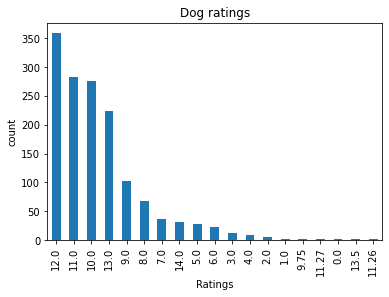

In [532]:
#Plot the chart of the count of each rating
twitter_archive_master.rating_numerator.value_counts().plot(xlabel = 'Ratings',ylabel = 'count',title = 'Dog ratings',kind = 'bar')